In [16]:
img = rand(2, 2)

2×2 Matrix{Float64}:
 0.89332   0.721885
 0.235104  0.188098

In [17]:
a = [1, 2, 3, 4]

4-element Vector{Int64}:
 1
 2
 3
 4

In [18]:
map(Float64, a)

4-element Vector{Float64}:
 1.0
 2.0
 3.0
 4.0

In [19]:
Float64.(a)

4-element Vector{Float64}:
 1.0
 2.0
 3.0
 4.0

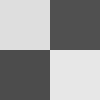

In [20]:
using Images

img = Gray.(rand(2, 2))

In [21]:
dump(img[1,1])

Gray{Float64}
  val: Float64 0.8691107147037345


In [22]:
sizeof(img)

32

In [23]:
imgg = img
dump(sizeof(img))
img == img

Int64 32


true

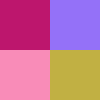

In [24]:
imgc = rand(RGB{Float32}, 2, 2)

In [25]:
dump(imgc)
size(imgc)

Array{RGB{Float32}}((2, 2))
  1: RGB{Float32}
    r: Float32 0.73956245f0
    g: Float32 0.085317016f0
    b: Float32 0.42634314f0
  2: RGB{Float32}
    r: Float32 0.9775923f0
    g: Float32 0.5489781f0
    b: Float32 0.7233865f0
  3: RGB{Float32}
    r: Float32 0.58150613f0
    g: Float32 0.44347674f0
    b: Float32 0.97366434f0
  4: RGB{Float32}
    r: Float32 0.75493205f0
    g: Float32 0.6911877f0
    b: Float32 0.26451898f0


(2, 2)

In [26]:
c = imgc[1, 1]; (red(c), green(c), blue(c))

(0.73956245f0, 0.085317016f0, 0.42634314f0)

In [27]:
dump(BGR(c))

BGR{Float32}
  b: Float32 0.42634314f0
  g: Float32 0.085317016f0
  r: Float32 0.73956245f0


In [28]:
c24 = RGB24(c); dump(c24)

RGB24
  color: UInt32 0x00bd166d


In [29]:
r = red(c24)

0.741N0f8

In [30]:
dump(r)

N0f8
  i: UInt8 0xbd


In [31]:
RGB(8,2,0)

ArgumentError: ArgumentError: (8, 2, 0) are integers in the range 0-255, but integer inputs are encoded with the N0f8
  type, an 8-bit type representing 256 discrete values between 0 and 1.
  Consider dividing your input values by 255, for example: RGB{N0f8}(8/255,2/255,0/255)
  Or use `reinterpret(N0f8, x)` if `x` is a `UInt8`.
  See the READMEs for FixedPointNumbers and ColorTypes for more information.

In [32]:
using FixedPointNumbers

(typemax(N0f8), eps(N0f8))

(1.0N0f8, 0.004N0f8)

In [33]:
(typemax(N0f16), eps(N0f16))

(1.0N0f16, 2.0e-5N0f16)

In [34]:
(typemax(N4f12), eps(N4f12))

(16.0037N4f12, 0.0002N4f12)

In [35]:
using Images

r = range(0, stop=1, length=11)
b = range(1, stop=0, length=11)

img1d = colorview(RGB, r, zeroarray, b)

In [36]:
a1 = reshape([1, 2], 2, 1)
a2 = [1.0, 2.0]'


a1p, a2p = paddedviews(0, a1, a2)

dump(a1p)
dump(a2p)


PaddedView{Int64, 2, Tuple{Base.OneTo{Int64}, Base.OneTo{Int64}}, Matrix{Int64}}
  fillvalue: Int64 0
  data: Array{Int64}((2, 1)) [1; 2;;]
  indices: Tuple{Base.OneTo{Int64}, Base.OneTo{Int64}}
    1: Base.OneTo{Int64}
      stop: Int64 2
    2: Base.OneTo{Int64}
      stop: Int64 2
PaddedView{Float64, 2, Tuple{Base.OneTo{Int64}, Base.OneTo{Int64}}, LinearAlgebra.Adjoint{Float64, Vector{Float64}}}
  fillvalue: Float64 0.0
  data: LinearAlgebra.Adjoint{Float64, Vector{Float64}}
    parent: Array{Float64}((2,)) [1.0, 2.0]
  indices: Tuple{Base.OneTo{Int64}, Base.OneTo{Int64}}
    1: Base.OneTo{Int64}
      stop: Int64 2
    2: Base.OneTo{Int64}
      stop: Int64 2


In [37]:
img1 = reshape(1:8, (2, 4))
img2 = reshape(11:18, (2, 4))
sv = StackedView(img1, img2)

2×2×4 StackedView{Int64, 3, Tuple{Base.ReshapedArray{Int64, 2, UnitRange{Int64}, Tuple{}}, Base.ReshapedArray{Int64, 2, UnitRange{Int64}, Tuple{}}}}:
[:, :, 1] =
  1   2
 11  12

[:, :, 2] =
  3   4
 13  14

[:, :, 3] =
  5   6
 15  16

[:, :, 4] =
  7   8
 17  18

In [38]:
imgMatrix = reshape(sv, (2, 8))

2×8 reshape(::StackedView{Int64, 3, Tuple{Base.ReshapedArray{Int64, 2, UnitRange{Int64}, Tuple{}}, Base.ReshapedArray{Int64, 2, UnitRange{Int64}, Tuple{}}}}, 2, 8) with eltype Int64:
  1   2   3   4   5   6   7   8
 11  12  13  14  15  16  17  18

In [3]:
struct User 
    first_name::String
    last_name::String
end

v = User("omofolarin", "shonibare")

typeof(v)

User

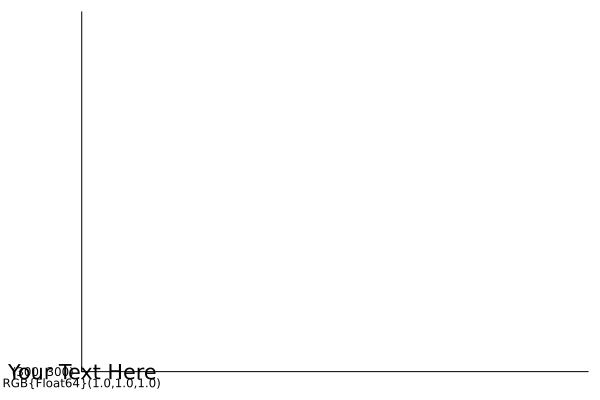

In [12]:
using Images, Plots


width, height = 1200, 1600

canvas = RGB(1.0, 1.0, 1.0)

text_position = (300, 300) 
text_color = RGB(0.0, 0.0, 0.0)
text_size = 36
text = "Your Text Here"

annotate!(canvas, text_position, text, text_color, font=Plots.font("sans-serif", text_size))


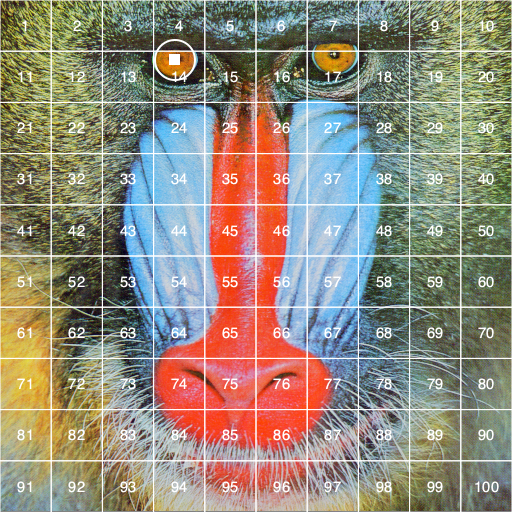

In [3]:
using Luxor, Images, TestImages

marvin = testimage("mandrill")
M = Luxor.Colors.ARGB32.(marvin)
Drawing(M)
M[55:65, 170:180] .= colorant"white"
sethue("white")
circle(Point(60, 175), 20, :stroke)



fontsize(15)
sethue("white")
setline(1)


transform([0 1 1 0 0 0])
cells = Table(10, 10, 512 / 10, 512 / 10, Point(512 / 2, 512 / 2))

for (pos, n) in cells 
    text(string(n), pos, halign = :center, valign = :middle)
    box(pos, 512 / 10, 512 / 10, :stroke)

end

# setline(5)
# highlightcells(cells, collect(1: 100)[[2, 4, 35, 69]], :stroke, color = colarant"blue")

M

In [7]:
using Luxor

fontsize(16)
fontface("Georgia-Bold")
text("Georgia: a serif typeface designed in 1993 by Matthew Carter.", halign=:center)

Point(-251.05078125, 0.0)